In [1]:
from tqdm import tqdm
import pandas as pd
import requests as req 
from bs4 import BeautifulSoup as bs
import re
from kiwipiepy import Kiwi
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
# 컴퓨터용 브라우저 -> 데이터 요청 및 응답 
from selenium import webdriver as wb
# 컴퓨터용 키보드 (Enter,Del 등 ) 컴퓨터에게 키보드를 전달하는 역할 
from selenium.webdriver.common.keys import Keys 
# 선택자를 구분할때 사용하는 라이브러리 (필수)
from selenium.webdriver.common.by import By
#쉬는 시간을 주는 라이브러리 
import time

In [2]:
def preprocess_sentence_kr(w):
  w = w.strip()
  w = re.sub(r"[^0-9가-힣?.!,¿a-zA-Z]+", " ", w) 
  w = w.strip() 
  return w
 

In [3]:
driver = wb.Chrome()
driver.get('https://www.naver.com/')
time.sleep(0.5)
search=driver.find_element(By.ID,'query')
search.send_keys('음식물 처리기')
search.send_keys(Keys.ENTER)
time.sleep(0.5)
#driver.find_element(By.CSS_SELECTOR,'#lnb > div.lnb_group > div > div.lnb_nav_area._nav_area_root > div > div.api_flicking_wrap._conveyer_root > div:nth-child(5) > a').click()
driver.find_elements(By.CSS_SELECTOR,'a.tab')[4].click()
driver.find_element(By.CSS_SELECTOR,'.spnew.ico_filter_arr').click()
time.sleep(0.5)
driver.find_elements(By.CSS_SELECTOR,'a.txt')[6].click()

In [4]:
body=driver.find_element(By.TAG_NAME,'body')
body.send_keys(Keys.END)
for i in range(10):
    body=driver.find_element(By.TAG_NAME,'body')
    body.send_keys(Keys.END)
    time.sleep(0.3)

In [5]:
# 순수한 url 을 담기 
#요소.get_attribute('속성명')
link_list=[]
aTag=driver.find_elements(By.CSS_SELECTOR,'a.fender-ui_228e3bd1._F4b_iMlsFBN3anLCC2o')
aTag[0].get_attribute('href')
for i in aTag:
     link_list.append(i.get_attribute('href'))
link_list   

['https://kin.naver.com/qna/detail.naver?d1id=8&dirId=802&docId=490510354&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=8&dirId=802&docId=491046605&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=8&dirId=80101&docId=413811604&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=8&dirId=80201&docId=490688527&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=5&dirId=50503&docId=491234500&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=3&dirId=31501&docId=489794339&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=5&dirId=50104&docId=490729449&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyym

In [6]:
driver = wb.Chrome()
f=open('../../data/naver_data.txt','w',encoding='utf-8')
for i in tqdm(range(len(link_list))):
    driver.get(link_list[i])
    time.sleep(0.3)
    try:
        driver.find_element(By.CSS_SELECTOR,'#nextPageButton').click()
    except:
        pass
    a=driver.find_elements(By.CSS_SELECTOR,'.se-main-container')
    for j in a:
        content=preprocess_sentence_kr(j.text)
        f.write(content)
f.close()        
driver.quit()    

100%|██████████| 110/110 [02:18<00:00,  1.26s/it]


In [7]:
f=open('../../data/naver_data.txt','r',encoding='utf-8')
review=f.readline()
f.close()




In [8]:
kiwi=Kiwi()
#토큰화
token=kiwi.tokenize(review)

In [9]:

# 일반 명사만 추출 (NNG)
# token 의 리스트를 돌면서 tag가 NNG 인 form을 nng_list에 답으세요
nn_list=[]
for i in tqdm(token):
    if(i.tag=='NNG' or i.tag=='NNP'):
        nn_list.append(i.form)

100%|██████████| 111561/111561 [00:00<00:00, 779310.71it/s]


In [10]:
counter=Counter(nn_list)
top_100=counter.most_common(100)
top_100

[('음식물', 2081),
 ('처리', 2042),
 ('제품', 790),
 ('방식', 742),
 ('건조', 558),
 ('미생물', 557),
 ('사용', 490),
 ('쓰레기', 404),
 ('분쇄', 401),
 ('냄새', 396),
 ('소음', 292),
 ('확인', 289),
 ('환경', 283),
 ('관리', 251),
 ('지원', 247),
 ('구매', 244),
 ('구입', 238),
 ('렌탈', 228),
 ('가능', 226),
 ('가정', 221),
 ('추천', 221),
 ('지원금', 217),
 ('설치', 216),
 ('필요', 201),
 ('교체', 188),
 ('물', 183),
 ('필터', 182),
 ('신청', 182),
 ('후', 170),
 ('싱크대', 163),
 ('비용', 161),
 ('선택', 157),
 ('지자체', 155),
 ('비교', 152),
 ('발생', 147),
 ('전기료', 147),
 ('가격', 143),
 ('문제', 143),
 ('방법', 143),
 ('내부', 139),
 ('배출', 139),
 ('내용', 132),
 ('안녕', 132),
 ('참고', 131),
 ('뼈', 131),
 ('후기', 127),
 ('고민', 127),
 ('경우', 125),
 ('불편', 124),
 ('아래', 123),
 ('도움', 115),
 ('때', 114),
 ('부담', 110),
 ('답변', 110),
 ('통', 102),
 ('미닉스', 102),
 ('주방', 101),
 ('정보', 101),
 ('일반', 100),
 ('악취', 100),
 ('브랜드', 99),
 ('모델', 99),
 ('정도', 94),
 ('최대', 94),
 ('보조금', 91),
 ('제공', 90),
 ('정리', 90),
 ('용량', 88),
 ('이유', 86),
 ('기준', 86),
 ('고려', 84),
 ('인증', 83

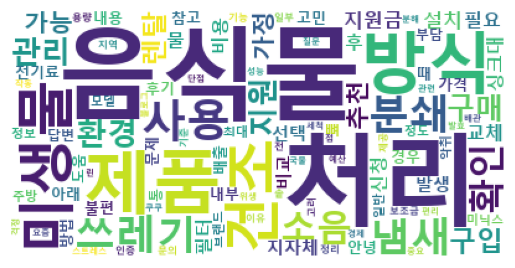

In [11]:
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgunbd.ttf',
    background_color='white'    
).generate_from_frequencies(dict(top_100))
plt.imshow(wc)
plt.axis('off')
plt.show()